In [1]:
# analyze_similarity_metrics.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# 1. Load the Jaccard similarity matrix
similarity_csv_path = r"C:\Users\tered\Desktop\recommender_system\experiments\01_baseline_jaccard\results.csv"
similarity_df = pd.read_csv(similarity_csv_path)
similarity_matrix = similarity_df.values  # Convert DataFrame to NumPy array

In [3]:
# 2. Calculate general metrics
mean_similarity = np.mean(similarity_matrix)
std_similarity = np.std(similarity_matrix)
min_similarity = np.min(similarity_matrix)
max_similarity = np.max(similarity_matrix)

print("General Similarity Metrics:")
print(f"Mean: {mean_similarity:.4f}")
print(f"Standard Deviation: {std_similarity:.4f}")
print(f"Minimum: {min_similarity:.4f}")
print(f"Maximum: {max_similarity:.4f}")

General Similarity Metrics:
Mean: 0.0292
Standard Deviation: 0.0666
Minimum: 0.0000
Maximum: 1.0000


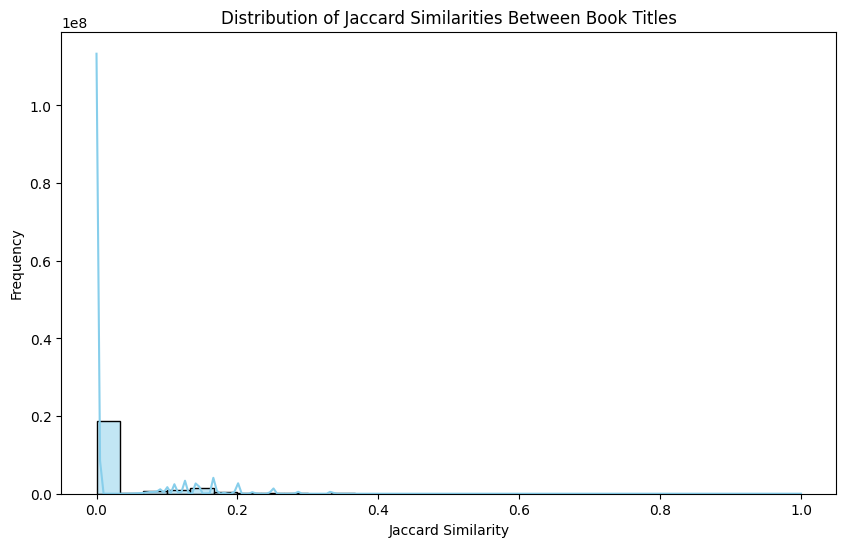

In [4]:
# 3. Plot histogram of all similarity scores (excluding the diagonal 1s)
flat_similarities = similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]
plt.figure(figsize=(10, 6))
sns.histplot(flat_similarities, bins=30, kde=True, color="skyblue")
plt.title("Distribution of Jaccard Similarities Between Book Titles")
plt.xlabel("Jaccard Similarity")
plt.ylabel("Frequency")
output_dir = os.path.dirname(similarity_csv_path)
plt.savefig(os.path.join(output_dir, "plots", "jaccard_histogram.png"))
plt.show()

In [5]:
# 4. Top-N similar books to a specific book (e.g., index 0)
N = 10
book_index = 5  # Change this index to test other titles
top_n_indices = np.argsort(similarity_matrix[book_index])[::-1][1:N+1]  # skip itself

print(f"\nTop {N} most similar books to book at index {book_index}:")
for i, idx in enumerate(top_n_indices, 1):
    sim_score = similarity_matrix[book_index, idx]
    print(f"{i}. Index {idx} — Similarity: {sim_score:.4f}")


Top 10 most similar books to book at index 5:
1. Index 1572 — Similarity: 0.3333
2. Index 3513 — Similarity: 0.3333
3. Index 3581 — Similarity: 0.3333
4. Index 3576 — Similarity: 0.3333
5. Index 1822 — Similarity: 0.3333
6. Index 1828 — Similarity: 0.3333
7. Index 3556 — Similarity: 0.3333
8. Index 1061 — Similarity: 0.3333
9. Index 3538 — Similarity: 0.3333
10. Index 1060 — Similarity: 0.3333
